# Search Algorithms

### Data for tests
To begin, let's generate some random data to work with. Ensure that a common random number seed is used to generate each of the arrays. We will make five arrays, each of length 512, 1024, 2048, 4096, and 8192 containing randomly generated uniformly distributed integers from 1 to 10000.  

In [43]:
import numpy as np
import pandas as pd
import time
np.random.seed = 34

r_1 = np.random.randint(1,10000, 2**9)
r_2 = np.random.randint(1,10000, 2**10)
r_3 = np.random.randint(1,10000, 2**11)
r_4 = np.random.randint(1,10000, 2**12)
r_5 = np.random.randint(1,10000, 2**13)
r_6 = np.random.randint(1,10000, 2**14)
r_7 = np.random.randint(1,10000, 2**15)

## Setup

In [44]:
def timeit(log):
    def log_it(func):
        def wrapped(*args, **kw):
            ts = time.time_ns() // 1000000 
            result = func(*args, **kw)
            te = time.time_ns() // 1000000 
            log.append(te-ts)
            return result
        return wrapped
    return log_it

## Binary Search
Here we want to explore binary search as a baseline, what is the maximum execution time for each array size, what is the average?

The expiriment will be searching the largest number found in the array (predetermined)

In [45]:
binary_log = []
@timeit(binary_log)
def binary_search(arr, item):
    """
    Returns the index of the item if found, otherwise None. Time-complexity = O(log n)
    Parameters
    ----------
        arr : list, array
            the array to look in
        item : int, float
            the item to find
    """
    high_idx = len(arr)-1
    low_idx = 0

    while low_idx <= high_idx:
        mid_idx = (low_idx + high_idx)//2
        guess = arr[mid_idx]
        if guess == item:
            return mid_idx
        if guess > item:
            high_idx = mid_idx - 1
        else:
            low_idx = mid_idx + 1
    return None

# Quick Sort

In [46]:
sort_log = []
@timeit(sort_log)
def total_qsort(arr):
    def qsort(arr):
        """
        Returns a sorted array. Time-complexity = O(n log n)
        Parameters
        ----------
            arr : list, array
                the array to sort
        """
        #Base case  (already sorted)
        if len(arr) < 2:
            return arr
        #Recursive case
        else:
            pivot = arr[0]
            less = [i for i in arr[1:] if i <= pivot]
            greater = [i for i in arr[1:] if i > pivot]
            return qsort(less) + [pivot] + qsort(greater)
    return qsort(arr)

# Binary Search Experiment

In [47]:
#Output should be a table of 30 trials 
#of each array size and the time it took
#to find the largest number
r_1_max = max(r_1)
r_2_max = max(r_2)
r_3_max = max(r_3)
r_4_max = max(r_4)
r_5_max = max(r_5)
r_6_max = max(r_6)
r_7_max = max(r_7)

#### Rules of the road
- For binary search to work, it must be with a sorted array

In [48]:
#Raw data
arrays = [r_1,r_2,r_3,r_4,r_5, r_6,r_7]
#Container for sorted
sorted_arrays = []
#Future search term for experiment
search_item = [r_1_max,r_2_max,r_3_max,
               r_4_max,r_5_max,r_6_max,r_7_max]

trials = 100


In [49]:
#Sorting the arrays, putting in container
for each_array in arrays:
    for trial in range(trials):
        s_a = total_qsort(each_array)
    sorted_arrays.append(s_a)

In [50]:
len(sort_log)

700

In [51]:
for idx,array in enumerate(sorted_arrays):
    for trial in range(trials):
        binary_search(array, search_item[idx])

In [52]:
len(binary_log)

700

# Linear Search

In [53]:
linear_log = []
@timeit(linear_log)
def linear_search(arr, item):
    """
    Returns the index of item in array if found, otherwise None. Time-complexity = O(n)
    Parameters
    ----------
        arr : list, array
            the array to look in
        item : int, float
            the item to find
    """
    for i,potential in enumerate(arr):
        if item == potential:
            return i
        else:
            continue
    return None

In [54]:
for idx,array in enumerate(sorted_arrays):
    for trial in range(trials):
        linear_search(array, search_item[idx])

In [55]:
len(linear_log)

700

In [57]:
df = pd.DataFrame({'Array Length': sorted(list(map(len, arrays))*trials),
                   'qsort': sort_log,
                   'binary':binary_log,
                   'linear':linear_log, 
                   'binary_plus_sort': np.array(sort_log)})

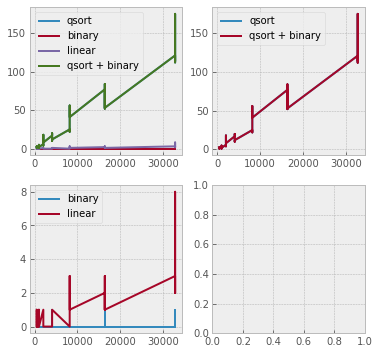

In [65]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (6,6))
ax1,ax2,ax3,ax4 = axes.flatten()
ax1.plot(df['Array Length'], df['qsort'], label = 'qsort')
ax1.plot(df['Array Length'], df['binary'], label = 'binary')
ax1.plot(df['Array Length'], df['linear'], label = 'linear')
ax1.plot(df['Array Length'], df['binary_plus_sort'], label = 'qsort + binary')
ax1.legend()

ax2.plot(df['Array Length'], df['qsort'], label = 'qsort')
ax2.plot(df['Array Length'], df['binary_plus_sort'], label = 'qsort + binary')
ax2.legend()


ax3.plot(df['Array Length'], df['binary'], label = 'binary')
ax3.plot(df['Array Length'], df['linear'], label = 'linear')
ax3.legend()
